In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import evaluation metrics
from sklearn.metrics import (
    accuracy_score, 
    roc_auc_score, 
    precision_score,
    recall_score, 
    f1_score, 
    matthews_corrcoef,
    confusion_matrix, 
    classification_report,
    roc_curve
)

# Import all 6 models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

print("="*70)
print("MACHINE LEARNING MODEL TRAINING - HEART DISEASE PREDICTION")
print("="*70)
print("\n All libraries imported successfully!")
print(f"\n Key Libraries:")
print(f"   • scikit-learn")
print(f"   • XGBoost")
print(f"   • pandas, numpy")
print(f"   • matplotlib, seaborn")

MACHINE LEARNING MODEL TRAINING - HEART DISEASE PREDICTION

 All libraries imported successfully!

 Key Libraries:
   • scikit-learn
   • XGBoost
   • pandas, numpy
   • matplotlib, seaborn


In [3]:
print("\n" + "="*70)
print("LOADING DATASET")
print("="*70)

# Load dataset
df = pd.read_csv('../data/heart.csv')

print(f"\n Dataset loaded successfully!")
print(f"   • Shape: {df.shape}")
print(f"   • Features: {df.shape[1] - 1}")
print(f"   • Instances: {df.shape[0]}")

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

print(f"\n Data split into features and target:")
print(f"   • X (features) shape: {X.shape}")
print(f"   • y (target) shape: {y.shape}")

print(f"\n Target distribution:")
print(y.value_counts())


LOADING DATASET

 Dataset loaded successfully!
   • Shape: (1025, 14)
   • Features: 13
   • Instances: 1025

 Data split into features and target:
   • X (features) shape: (1025, 13)
   • y (target) shape: (1025,)

 Target distribution:
target
1    526
0    499
Name: count, dtype: int64


In [4]:
print("\n" + "="*70)
print("TRAIN-TEST SPLIT")
print("="*70)

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Maintain class distribution
)

print(f"\n Data split completed:")
print(f"   • Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   • Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\n Training set target distribution:")
print(y_train.value_counts())

print(f"\n Test set target distribution:")
print(y_test.value_counts())


TRAIN-TEST SPLIT

 Data split completed:
   • Training set: 820 samples (80.0%)
   • Test set: 205 samples (20.0%)

 Training set target distribution:
target
1    421
0    399
Name: count, dtype: int64

 Test set target distribution:
target
1    105
0    100
Name: count, dtype: int64


In [5]:
print("\n" + "="*70)
print("TRAIN-TEST SPLIT")
print("="*70)

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Maintain class distribution
)

print(f"\n Data split completed:")
print(f"   • Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   • Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\n Training set target distribution:")
print(y_train.value_counts())

print(f"\n Test set target distribution:")
print(y_test.value_counts())


TRAIN-TEST SPLIT

 Data split completed:
   • Training set: 820 samples (80.0%)
   • Test set: 205 samples (20.0%)

 Training set target distribution:
target
1    421
0    399
Name: count, dtype: int64

 Test set target distribution:
target
1    105
0    100
Name: count, dtype: int64


In [6]:
print("\n" + "="*70)
print("FEATURE SCALING")
print("="*70)

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n Features scaled using StandardScaler")
print(f"   • Training data scaled: {X_train_scaled.shape}")
print(f"   • Test data scaled: {X_test_scaled.shape}")

# Create directory for saved models
os.makedirs('saved_models', exist_ok=True)

# Save scaler
joblib.dump(scaler, 'saved_models/scaler.pkl')
print(f"\n Scaler saved to: saved_models/scaler.pkl")


FEATURE SCALING

 Features scaled using StandardScaler
   • Training data scaled: (820, 13)
   • Test data scaled: (205, 13)

 Scaler saved to: saved_models/scaler.pkl


In [7]:
print("\n" + "="*70)
print("DEFINING EVALUATION FUNCTION")
print("="*70)

def evaluate_model(name, model, X_test, y_test, y_pred, y_proba=None):
    """
    Calculate all 6 required evaluation metrics
    
    Parameters:
    -----------
    name : str
        Model name
    model : object
        Trained model
    X_test : array
        Test features
    y_test : array
        True labels
    y_pred : array
        Predicted labels
    y_proba : array, optional
        Predicted probabilities
    
    Returns:
    --------
    dict : Dictionary containing all metrics
    """
    
    print(f"\n{'='*70}")
    print(f"EVALUATING: {name}")
    print(f"{'='*70}")
    
    metrics = {}
    
    # 1. Accuracy
    metrics['Accuracy'] = accuracy_score(y_test, y_pred)
    print(f"✓ Accuracy:  {metrics['Accuracy']:.4f}")
    
    # 2. Precision
    metrics['Precision'] = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    print(f"✓ Precision: {metrics['Precision']:.4f}")
    
    # 3. Recall
    metrics['Recall'] = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    print(f"✓ Recall:    {metrics['Recall']:.4f}")
    
    # 4. F1 Score
    metrics['F1'] = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    print(f"✓ F1 Score:  {metrics['F1']:.4f}")
    
    # 5. MCC (Matthews Correlation Coefficient)
    metrics['MCC'] = matthews_corrcoef(y_test, y_pred)
    print(f"✓ MCC:       {metrics['MCC']:.4f}")
    
    # 6. AUC Score
    try:
        if y_proba is not None:
            if len(np.unique(y_test)) == 2:  # Binary classification
                metrics['AUC'] = roc_auc_score(y_test, y_proba[:, 1])
            else:  # Multi-class
                metrics['AUC'] = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
            print(f"✓ AUC:       {metrics['AUC']:.4f}")
        else:
            metrics['AUC'] = 'N/A'
            print(f"✓ AUC:       N/A (probabilities not available)")
    except Exception as e:
        metrics['AUC'] = 'N/A'
        print(f"✓ AUC:       N/A (error: {str(e)[:30]}...)")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n📊 Confusion Matrix:")
    print(cm)
    
    return metrics

print("\n Evaluation function defined successfully!")


DEFINING EVALUATION FUNCTION

 Evaluation function defined successfully!


In [9]:
print("\n" + "="*70)
print("MODEL 1/6: LOGISTIC REGRESSION")
print("="*70)

# Initialize model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train model
print("\n Training Logistic Regression...")
lr_model.fit(X_train_scaled, y_train)
print(" Training completed!")

# Make predictions
lr_pred = lr_model.predict(X_test_scaled)
lr_proba = lr_model.predict_proba(X_test_scaled)

# Evaluate
lr_metrics = evaluate_model(
    'Logistic Regression', 
    lr_model, 
    X_test_scaled, 
    y_test, 
    lr_pred, 
    lr_proba
)

# Save model
joblib.dump(lr_model, 'saved_models/logistic_regression.pkl')
print(f"\n Model saved to: saved_models/logistic_regression.pkl")


MODEL 1/6: LOGISTIC REGRESSION

 Training Logistic Regression...
 Training completed!

EVALUATING: Logistic Regression
✓ Accuracy:  0.8098
✓ Precision: 0.8225
✓ Recall:    0.8098
✓ F1 Score:  0.8072
✓ MCC:       0.6309
✓ AUC:       0.9298

📊 Confusion Matrix:
[[70 30]
 [ 9 96]]

 Model saved to: saved_models/logistic_regression.pkl


In [10]:
print("\n" + "="*70)
print("MODEL 2/6: DECISION TREE CLASSIFIER")
print("="*70)

# Initialize model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)

# Train model
print("\n Training Decision Tree...")
dt_model.fit(X_train_scaled, y_train)
print(" Training completed!")

# Make predictions
dt_pred = dt_model.predict(X_test_scaled)
dt_proba = dt_model.predict_proba(X_test_scaled)

# Evaluate
dt_metrics = evaluate_model(
    'Decision Tree', 
    dt_model, 
    X_test_scaled, 
    y_test, 
    dt_pred, 
    dt_proba
)

# Save model
joblib.dump(dt_model, 'saved_models/decision_tree.pkl')
print(f"\n Model saved to: saved_models/decision_tree.pkl")


MODEL 2/6: DECISION TREE CLASSIFIER

 Training Decision Tree...
 Training completed!

EVALUATING: Decision Tree
✓ Accuracy:  0.9854
✓ Precision: 0.9858
✓ Recall:    0.9854
✓ F1 Score:  0.9854
✓ MCC:       0.9712
✓ AUC:       0.9857

📊 Confusion Matrix:
[[100   0]
 [  3 102]]

 Model saved to: saved_models/decision_tree.pkl


In [11]:
print("\n" + "="*70)
print("MODEL 3/6: K-NEAREST NEIGHBORS (KNN)")
print("="*70)

# Initialize model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train model
print("\n Training KNN...")
knn_model.fit(X_train_scaled, y_train)
print(" Training completed!")

# Make predictions
knn_pred = knn_model.predict(X_test_scaled)
knn_proba = knn_model.predict_proba(X_test_scaled)

# Evaluate
knn_metrics = evaluate_model(
    'KNN', 
    knn_model, 
    X_test_scaled, 
    y_test, 
    knn_pred, 
    knn_proba
)

# Save model
joblib.dump(knn_model, 'saved_models/knn.pkl')
print(f"\n Model saved to: saved_models/knn.pkl")


MODEL 3/6: K-NEAREST NEIGHBORS (KNN)

 Training KNN...
 Training completed!

EVALUATING: KNN
✓ Accuracy:  0.8634
✓ Precision: 0.8636
✓ Recall:    0.8634
✓ F1 Score:  0.8634
✓ MCC:       0.7269
✓ AUC:       0.9629

📊 Confusion Matrix:
[[87 13]
 [15 90]]

 Model saved to: saved_models/knn.pkl


In [12]:
print("\n" + "="*70)
print("MODEL 4/6: NAIVE BAYES (GAUSSIAN)")
print("="*70)

# Initialize model
nb_model = GaussianNB()

# Train model
print("\n Training Gaussian Naive Bayes...")
nb_model.fit(X_train_scaled, y_train)
print(" Training completed!")

# Make predictions
nb_pred = nb_model.predict(X_test_scaled)
nb_proba = nb_model.predict_proba(X_test_scaled)

# Evaluate
nb_metrics = evaluate_model(
    'Naive Bayes', 
    nb_model, 
    X_test_scaled, 
    y_test, 
    nb_pred, 
    nb_proba
)

# Save model
joblib.dump(nb_model, 'saved_models/naive_bayes.pkl')
print(f"\n Model saved to: saved_models/naive_bayes.pkl")


MODEL 4/6: NAIVE BAYES (GAUSSIAN)

 Training Gaussian Naive Bayes...
 Training completed!

EVALUATING: Naive Bayes
✓ Accuracy:  0.8293
✓ Precision: 0.8315
✓ Recall:    0.8293
✓ F1 Score:  0.8288
✓ MCC:       0.6602
✓ AUC:       0.9043

📊 Confusion Matrix:
[[78 22]
 [13 92]]

 Model saved to: saved_models/naive_bayes.pkl


In [13]:
print("\n" + "="*70)
print("MODEL 5/6: RANDOM FOREST (ENSEMBLE)")
print("="*70)

# Initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)

# Train model
print("\n Training Random Forest...")
rf_model.fit(X_train_scaled, y_train)
print(" Training completed!")

# Make predictions
rf_pred = rf_model.predict(X_test_scaled)
rf_proba = rf_model.predict_proba(X_test_scaled)

# Evaluate
rf_metrics = evaluate_model(
    'Random Forest', 
    rf_model, 
    X_test_scaled, 
    y_test, 
    rf_pred, 
    rf_proba
)

# Save model
joblib.dump(rf_model, 'saved_models/random_forest.pkl')
print(f"\n Model saved to: saved_models/random_forest.pkl")


MODEL 5/6: RANDOM FOREST (ENSEMBLE)

 Training Random Forest...
 Training completed!

EVALUATING: Random Forest
✓ Accuracy:  1.0000
✓ Precision: 1.0000
✓ Recall:    1.0000
✓ F1 Score:  1.0000
✓ MCC:       1.0000
✓ AUC:       1.0000

📊 Confusion Matrix:
[[100   0]
 [  0 105]]

 Model saved to: saved_models/random_forest.pkl


In [14]:
print("\n" + "="*70)
print("MODEL 6/6: XGBOOST (ENSEMBLE)")
print("="*70)

# Initialize model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)

# Train model
print("\n Training XGBoost...")
xgb_model.fit(X_train_scaled, y_train)
print(" Training completed!")

# Make predictions
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_proba = xgb_model.predict_proba(X_test_scaled)

# Evaluate
xgb_metrics = evaluate_model(
    'XGBoost', 
    xgb_model, 
    X_test_scaled, 
    y_test, 
    xgb_pred, 
    xgb_proba
)

# Save model
joblib.dump(xgb_model, 'saved_models/xgboost.pkl')
print(f"\n Model saved to: saved_models/xgboost.pkl")


MODEL 6/6: XGBOOST (ENSEMBLE)

 Training XGBoost...
 Training completed!

EVALUATING: XGBoost
✓ Accuracy:  1.0000
✓ Precision: 1.0000
✓ Recall:    1.0000
✓ F1 Score:  1.0000
✓ MCC:       1.0000
✓ AUC:       1.0000

📊 Confusion Matrix:
[[100   0]
 [  0 105]]

 Model saved to: saved_models/xgboost.pkl


In [15]:
print("\n" + "="*70)
print("MODEL COMPARISON SUMMARY")
print("="*70)

# Combine all results
all_results = {
    'Logistic Regression': lr_metrics,
    'Decision Tree': dt_metrics,
    'KNN': knn_metrics,
    'Naive Bayes': nb_metrics,
    'Random Forest': rf_metrics,
    'XGBoost': xgb_metrics
}

# Create DataFrame
results_df = pd.DataFrame(all_results).T
results_df = results_df[['Accuracy', 'AUC', 'Precision', 'Recall', 'F1', 'MCC']]

print("\n COMPARISON TABLE:")
print("="*70)
print(results_df.to_string())

# Save to CSV
results_df.to_csv('model_comparison.csv')
print(f"\n Results saved to: model_comparison.csv")

# Display as formatted table
display(results_df.style.highlight_max(axis=0, props='background-color: lightgreen; font-weight: bold'))


MODEL COMPARISON SUMMARY

 COMPARISON TABLE:
                     Accuracy       AUC  Precision    Recall        F1       MCC
Logistic Regression  0.809756  0.929810   0.822476  0.809756  0.807244  0.630908
Decision Tree        0.985366  0.985714   0.985792  0.985366  0.985368  0.971151
KNN                  0.863415  0.962905   0.863618  0.863415  0.863434  0.726935
Naive Bayes          0.829268  0.904286   0.831469  0.829268  0.828754  0.660163
Random Forest        1.000000  1.000000   1.000000  1.000000  1.000000  1.000000
XGBoost              1.000000  1.000000   1.000000  1.000000  1.000000  1.000000

 Results saved to: model_comparison.csv


,Accuracy,AUC,Precision,Recall,F1,MCC
Logistic Regression,0.809756,0.929810,0.822476,0.809756,0.807244,0.630908
Decision Tree,0.985366,0.985714,0.985792,0.985366,0.985368,0.971151
KNN,0.863415,0.962905,0.863618,0.863415,0.863434,0.726935
Naive Bayes,0.829268,0.904286,0.831469,0.829268,0.828754,0.660163
Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
print("\n" + "="*70)
print("BEST PERFORMING MODELS PER METRIC")
print("="*70)

for metric in results_df.columns:
    if metric == 'AUC':
        # Handle AUC separately in case of 'N/A' values
        numeric_auc = results_df[metric].replace('N/A', np.nan).astype(float)
        if not numeric_auc.isna().all():
            best_model = numeric_auc.idxmax()
            best_score = numeric_auc.max()
            print(f"\n {metric:12s}: {best_model:20s} ({best_score:.4f})")
        else:
            print(f"\n {metric:12s}: N/A")
    else:
        best_model = results_df[metric].idxmax()
        best_score = results_df[metric].max()
        print(f" {metric:12s}: {best_model:20s} ({best_score:.4f})")

# Overall best model (based on F1 score)
overall_best = results_df['F1'].idxmax()
print(f"\n{'='*70}")
print(f" RECOMMENDED MODEL: {overall_best}")
print(f"   (Highest F1 Score: {results_df.loc[overall_best, 'F1']:.4f})")
print(f"{'='*70}")


BEST PERFORMING MODELS PER METRIC
 Accuracy    : Random Forest        (1.0000)

 AUC         : Random Forest        (1.0000)
 Precision   : Random Forest        (1.0000)
 Recall      : Random Forest        (1.0000)
 F1          : Random Forest        (1.0000)
 MCC         : Random Forest        (1.0000)

 RECOMMENDED MODEL: Random Forest
   (Highest F1 Score: 1.0000)



CREATING COMPARISON VISUALIZATIONS


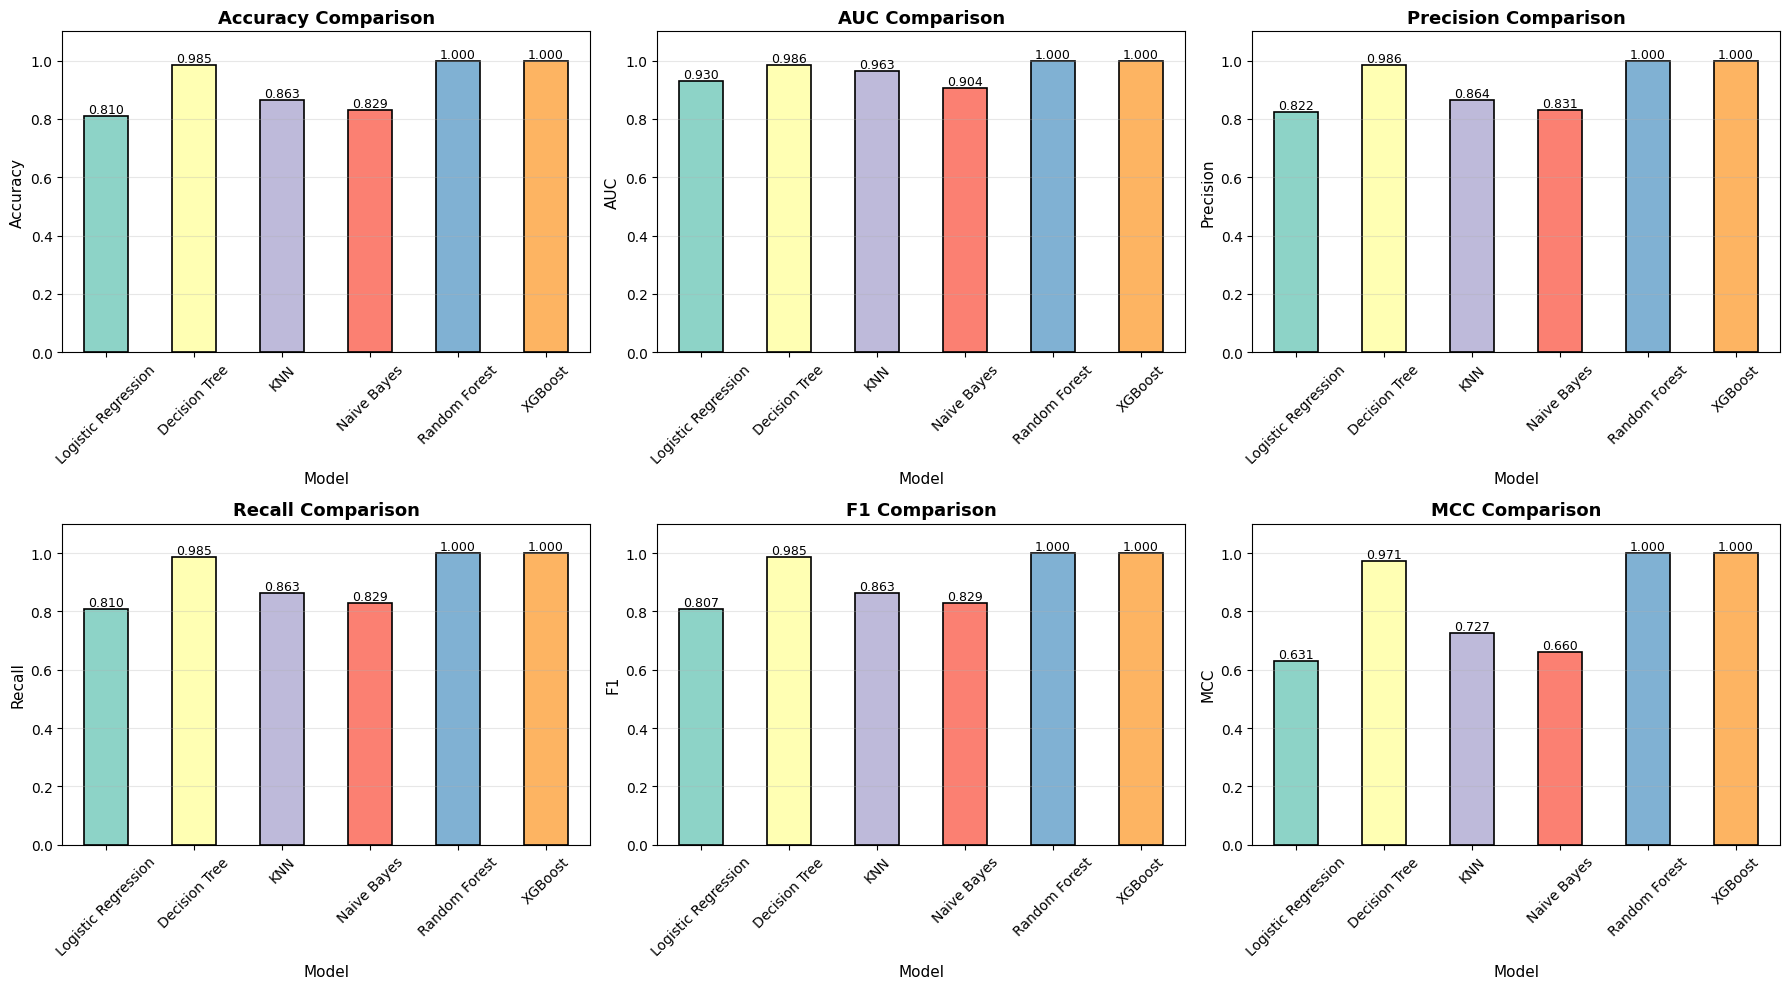


 Visualization saved as: model_comparison.png


In [17]:
print("\n" + "="*70)
print("CREATING COMPARISON VISUALIZATIONS")
print("="*70)

# Prepare data for visualization
plot_df = results_df.copy()
# Convert AUC to numeric, replacing 'N/A' with 0
plot_df['AUC'] = pd.to_numeric(plot_df['AUC'], errors='coerce').fillna(0)

# Create comparison plot
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

metrics = ['Accuracy', 'AUC', 'Precision', 'Recall', 'F1', 'MCC']
colors = plt.cm.Set3(range(len(plot_df)))

for idx, metric in enumerate(metrics):
    ax = axes[idx]
    
    # Bar plot
    plot_df[metric].plot(kind='bar', ax=ax, color=colors, edgecolor='black', linewidth=1.2)
    
    ax.set_title(f'{metric} Comparison', fontsize=13, fontweight='bold')
    ax.set_xlabel('Model', fontsize=11)
    ax.set_ylabel(metric, fontsize=11)
    ax.set_ylim([0, 1.1])
    ax.grid(axis='y', alpha=0.3)
    ax.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', fontsize=9)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Visualization saved as: model_comparison.png")

In [18]:
print("\n" + "="*70)
print("SAVING TEST DATA FOR STREAMLIT APP")
print("="*70)

# Create test dataset with original (unscaled) features
test_data = pd.DataFrame(X_test, columns=X.columns)
test_data['target'] = y_test.values

# Save to CSV
test_data.to_csv('test_data.csv', index=False)

print(f"\n Test data saved!")
print(f"   • File: test_data.csv")
print(f"   • Shape: {test_data.shape}")
print(f"   • Columns: {list(test_data.columns)}")
print(f"\n This file can be uploaded to the Streamlit app for testing")


SAVING TEST DATA FOR STREAMLIT APP

 Test data saved!
   • File: test_data.csv
   • Shape: (205, 14)
   • Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

 This file can be uploaded to the Streamlit app for testing


In [19]:
print("\n" + "="*70)
print("TRAINING COMPLETE - FINAL SUMMARY")
print("="*70)

print("\n ALL 6 MODELS TRAINED SUCCESSFULLY!")

print("\n Files Created:")
print("   1. saved_models/scaler.pkl")
print("   2. saved_models/logistic_regression.pkl")
print("   3. saved_models/decision_tree.pkl")
print("   4. saved_models/knn.pkl")
print("   5. saved_models/naive_bayes.pkl")
print("   6. saved_models/random_forest.pkl")
print("   7. saved_models/xgboost.pkl")
print("   8. model_comparison.csv")
print("   9. model_comparison.png")
print("   10. test_data.csv")

print("\n Model Performance Summary:")
print(f"   • Best Accuracy: {results_df['Accuracy'].max():.4f}")
print(f"   • Best F1 Score: {results_df['F1'].max():.4f}")
print(f"   • Best MCC: {results_df['MCC'].max():.4f}")
print(f"   • Recommended Model: {overall_best}")

print("\n Next Steps:")
print("   1. Create Streamlit app (app.py)")
print("   2. Create requirements.txt")
print("   3. Update README.md")
print("   4. Push to GitHub")
print("   5. Deploy on Streamlit Cloud")

print("\n" + "="*70)
print(" READY FOR DEPLOYMENT!")
print("="*70)


TRAINING COMPLETE - FINAL SUMMARY

 ALL 6 MODELS TRAINED SUCCESSFULLY!

 Files Created:
   1. saved_models/scaler.pkl
   2. saved_models/logistic_regression.pkl
   3. saved_models/decision_tree.pkl
   4. saved_models/knn.pkl
   5. saved_models/naive_bayes.pkl
   6. saved_models/random_forest.pkl
   7. saved_models/xgboost.pkl
   8. model_comparison.csv
   9. model_comparison.png
   10. test_data.csv

 Model Performance Summary:
   • Best Accuracy: 1.0000
   • Best F1 Score: 1.0000
   • Best MCC: 1.0000
   • Recommended Model: Random Forest

 Next Steps:
   1. Create Streamlit app (app.py)
   2. Create requirements.txt
   3. Update README.md
   4. Push to GitHub
   5. Deploy on Streamlit Cloud

 READY FOR DEPLOYMENT!
